In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import datetime as dt
import numpy as np
import copy

## Reading excel file


In [2]:
xls = pd.ExcelFile('data.xlsx')

## Reading individual Sheets

In [8]:
# Industrialisation DataFrame
ind = pd.read_excel(xls, 'industrialisation')
ind.head()
ind.shape

(2840, 30)

In [9]:
# CO2 dataframe
co2 = pd.read_excel(xls, 'Co2')
co2

,Entity,Code,Year,Annual CO2 emissions (tonnes )
0,Afghanistan,AFG,1949,14656.00
1,Afghanistan,AFG,1950,84272.00
2,Afghanistan,AFG,1951,91600.00
3,Afghanistan,AFG,1952,91600.00
4,Afghanistan,AFG,1953,106256.00
...,...,...,...,...
20848,Zimbabwe,ZWE,2013,11536239.29
20849,Zimbabwe,ZWE,2014,11866348.41
20850,Zimbabwe,ZWE,2015,10907603.94
20851,Zimbabwe,ZWE,2016,9932649.88


In [10]:
co2.shape

(20853, 4)

In [11]:
# Global Temps Dataframe
gltemp = pd.read_excel(xls, 'GlobalLandTemperaturesByCity')
gltemp.head()
gltemp.shape

(1048575, 7)

## Cleaning the DFs

### Cleaning Global Temps By City

In [12]:
gltemp.isna().sum()

dt                                   0
AverageTemperature               47547
AverageTemperatureUncertainty    47547
City                                 0
Country                              0
Latitude                             0
Longitude                            0
dtype: int64

In [13]:
gltemp.iloc[798583]['dt']

datetime.datetime(1900, 7, 1, 0, 0)

In [14]:
gltemp = gltemp.dropna()

In [15]:
gltemp.isna().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

In [16]:
print(gltemp.iloc[798580])

dt                               1987-07-01 00:00:00
AverageTemperature                             22.97
AverageTemperatureUncertainty                  0.207
City                                           Benxi
Country                                        China
Latitude                                      40.99N
Longitude                                    123.55E
Name: 836224, dtype: object


In [17]:
gltemp = gltemp.reset_index()

In [18]:
del gltemp['index']

In [19]:
gltemp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Ã…rhus,Denmark,57.05N,10.33E
1,1744-04-01,5.788,3.624,Ã…rhus,Denmark,57.05N,10.33E
2,1744-05-01,10.644,1.283,Ã…rhus,Denmark,57.05N,10.33E
3,1744-06-01,14.051,1.347,Ã…rhus,Denmark,57.05N,10.33E
4,1744-07-01,16.082,1.396,Ã…rhus,Denmark,57.05N,10.33E


In [20]:
gltemp['dt'] = pd.to_datetime(gltemp['dt'])


In [21]:
gltemp.head()


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Ã…rhus,Denmark,57.05N,10.33E
1,1744-04-01,5.788,3.624,Ã…rhus,Denmark,57.05N,10.33E
2,1744-05-01,10.644,1.283,Ã…rhus,Denmark,57.05N,10.33E
3,1744-06-01,14.051,1.347,Ã…rhus,Denmark,57.05N,10.33E
4,1744-07-01,16.082,1.396,Ã…rhus,Denmark,57.05N,10.33E


In [22]:
gltemp = gltemp[gltemp['dt'] > pd.Timestamp(year=1989, day=31, month=12)]

In [23]:
gltemp.head()
gltemp.shape

(119879, 7)

In [24]:
gltemp = gltemp.reset_index(drop=True)

In [26]:
#gltemp['dt'] = gltemp['dt'].dt.year
gltemp

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1990,4.267,0.459,Ã…rhus,Denmark,57.05N,10.33E
1,1990,5.895,0.460,Ã…rhus,Denmark,57.05N,10.33E
2,1990,6.565,0.299,Ã…rhus,Denmark,57.05N,10.33E
3,1990,8.068,0.222,Ã…rhus,Denmark,57.05N,10.33E
4,1990,12.944,0.287,Ã…rhus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
119874,2013,27.745,0.241,Bontang,Indonesia,0.80N,118.13E
119875,2013,27.795,0.258,Bontang,Indonesia,0.80N,118.13E
119876,2013,28.220,0.292,Bontang,Indonesia,0.80N,118.13E
119877,2013,27.127,0.231,Bontang,Indonesia,0.80N,118.13E


In [27]:
# List of countries being analysed
countries = ['India', 'China', 'United States', 'United Kingdom', 'Japan', 'Germany']

country = gltemp[gltemp['Country'].isin(countries)]

In [28]:
country = country.reset_index(drop=True)
country

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1990,-13.093,0.522,ÃœrÃ¼mqi,China,44.20N,87.20E
1,1990,-10.704,0.399,ÃœrÃ¼mqi,China,44.20N,87.20E
2,1990,-0.075,0.469,ÃœrÃ¼mqi,China,44.20N,87.20E
3,1990,9.557,0.249,ÃœrÃ¼mqi,China,44.20N,87.20E
4,1990,17.972,0.285,ÃœrÃ¼mqi,China,44.20N,87.20E
...,...,...,...,...,...,...,...
46026,2013,8.374,0.199,Bonn,Germany,50.63N,6.34E
46027,2013,11.463,0.235,Bonn,Germany,50.63N,6.34E
46028,2013,15.589,0.247,Bonn,Germany,50.63N,6.34E
46029,2013,19.869,0.280,Bonn,Germany,50.63N,6.34E


In [29]:
grouped = country.groupby(['dt', 'Country']).mean()

In [30]:
grouped

AverageTemperature  AverageTemperatureUncertainty
dt   Country                                                          
1990 China                    10.930208                       0.331760
     Germany                   9.785250                       0.289024
     India                    26.033152                       0.395594
     Japan                    14.147424                       0.269750
     United Kingdom           10.101881                       0.279119
...                                 ...                            ...
2013 Germany                   9.141339                       0.279643
     India                    27.179701                       0.512657
     Japan                    13.804729                       0.450458
     United Kingdom            9.156000                       0.434500
     United States            14.929293                       0.387619

[144 rows x 2 columns]

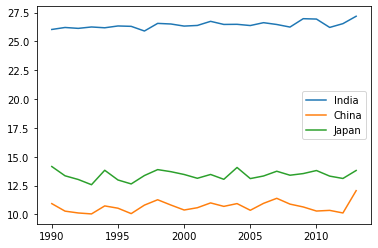

In [31]:
temp = grouped.reset_index()
india = temp[temp['Country'] == 'India']
china = temp[temp['Country'] == 'China']
japan = temp[temp['Country'] == 'Japan']
plt.plot(india['dt'], india['AverageTemperature'], label='India')
plt.plot(china['dt'], china['AverageTemperature'], label='China')
plt.plot(japan['dt'], japan['AverageTemperature'], label='Japan')
plt.legend()

In [32]:
#cleaning the co2 dataset

In [33]:
country = co2[co2['Entity'].isin(countries)]

In [35]:
co2 = country.reset_index(drop=True)

In [36]:
co2

,Entity,Code,Year,Annual CO2 emissions (tonnes )
0,China,CHN,1751,0.000000e+00
1,China,CHN,1752,0.000000e+00
2,China,CHN,1753,0.000000e+00
3,China,CHN,1754,0.000000e+00
4,China,CHN,1755,0.000000e+00
...,...,...,...,...
1415,United States,USA,2013,5.519613e+09
1416,United States,USA,2014,5.568759e+09
1417,United States,USA,2015,5.420804e+09
1418,United States,USA,2016,5.310861e+09


In [37]:
co2 = co2[co2['Year'] > 1989]

In [42]:
co2

,Entity,Code,Year,Annual CO2 emissions (tonnes )
226,China,CHN,1990,2.420302e+09
227,China,CHN,1991,2.538924e+09
228,China,CHN,1992,2.657112e+09
229,China,CHN,1993,2.835795e+09
230,China,CHN,1994,3.010242e+09
...,...,...,...,...
1415,United States,USA,2013,5.519613e+09
1416,United States,USA,2014,5.568759e+09
1417,United States,USA,2015,5.420804e+09
1418,United States,USA,2016,5.310861e+09


In [78]:
#grouping to be done

In [79]:
#industrialization dataframe

In [80]:
country = ind[ind['Country Name'].isin(countries)]

In [81]:
ind = country.reset_index(drop=True)

In [82]:
ind

,Country ISO3,Country Name,Indicator Id,Indicator,Subindicator Type,1990,1991,1992,1993,1994,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,CHN,China,3786,Competitive Industrial Performance Score,Value,0.088960,0.093291,0.100299,0.110058,0.123855,...,0.256939,0.277764,0.297416,0.313759,0.341954,0.360612,0.362264,0.376657,0.378066,0.356159
1,CHN,China,3787,Competitive Industrial Performance Rank,Rank,32.000000,33.000000,31.000000,30.000000,27.000000,...,17.000000,16.000000,12.000000,9.000000,6.000000,6.000000,6.000000,5.000000,5.000000,5.000000
2,CHN,China,3788,Competitive Industrial Performance Quintile,Value,0.700000,0.700000,0.700000,0.700000,0.900000,...,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000
3,CHN,China,3789,Impact of a country on World Manufactures Trade,Value,0.025118,0.025118,0.025118,0.028023,0.032752,...,0.093232,0.103558,0.114255,0.119714,0.129652,0.140085,0.143447,0.156094,0.162601,0.164545
4,CHN,China,3790,Share in world manufacturing exports index,Value,0.170583,0.170583,0.181641,0.215762,0.258881,...,0.810990,0.909162,0.999802,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,USA,United States,3802,Manufactured Exports per capita,Value,1200.451820,1292.108117,1357.289521,1390.028964,1534.043630,...,2321.691730,2657.235782,2920.815071,3178.236048,2292.570345,2770.181976,3137.032070,3225.220141,3231.862861,3269.323814
116,USA,United States,3803,Manufactured Exports per capita index,Value,0.074705,0.080411,0.084469,0.086507,0.094642,...,0.082268,0.087489,0.081631,0.082869,0.076393,0.085108,0.083214,0.090452,0.080208,0.052594
117,USA,United States,3804,Industrial export quality index,Value,0.848574,0.857247,0.857395,0.856469,0.861043,...,0.881568,0.878403,0.872286,0.859803,0.794639,0.781659,0.744058,0.748143,0.741225,0.708612
118,USA,United States,3805,Manufactured Exports share in total exports,Value,0.815927,0.828391,0.829481,0.830081,0.843921,...,0.861052,0.860435,0.848114,0.833288,0.757616,0.770793,0.760074,0.757452,0.754638,0.753809
